# Puissances en régime alternatif

Illustration des puissances (instantanée, active, réactive, apparente..) en régime alternatif.

PH, mai 2019 (mise à jour 2022 pour [JupyterLite](https://jupyterlite.readthedocs.io/)).

---

Installer Jupyter widgets dans JupyterLite:

In [ ]:
import piplite
await piplite.install('ipywidgets<8')

Quelques imports et définitions de helper functions

In [3]:
import numpy as np
from numpy import pi, sin, cos

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from ipywidgets.widgets import interact

In [5]:
# conversion rad <-> deg
d2r = np.deg2rad
r2d = np.rad2deg

In [6]:
def rms(x):
    '''valeur efficace du signal x
    (valable si x est fournit sur un nombre entier de période!)
    '''
    return np.sqrt(np.mean(x**2))

vecteur de phase pour les graphiques:

In [7]:
th_max = 2*pi 
th = np.linspace(0, th_max, 100)

## Monophasé, régime sinusoidal

(le cas "classique", le plus simple)

### Définition tension et courant
pour la simplicité des graphs, courant et tensions sont choisi d'amplitude=1.

$$ v = sin(\theta) $$
$$ i = sin(\theta - \phi) $$

où $\theta$ est la phase, qui sur un réseau à fréquence fixe évolue linéairement avec le temps $t$: 

$$\theta = 2\pi.f.t$$

ainsi, les graphs suivant sont gradués en phase, mais ce sont bien des tracés temporels

#### Propriété de la valeur efficace d'un signal sinusoïdal 

lien entre valeur efficance et amplitude:

$$ rms(x) = \frac{amplitude(x)}{\sqrt{2}} \approx 0.71 \, amplitude(x)$$

illustration numérique:

In [8]:
rms(sin(th)), 1/np.sqrt(2)

(0.7035623639735143, 0.7071067811865475)

### Tracé V,I

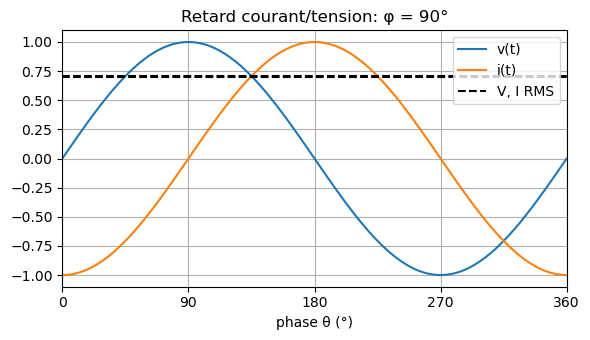

In [9]:
phi = 0.5 # rad

def plot_vi(phi_d):
    '''tracé tension-courant, avec retard phi(°)'''
    phi = d2r(phi_d)
    v = sin(th)
    i = sin(th-phi)
    
    fig, ax = plt.subplots(1,1, figsize=(6,3.5))
    ax.plot(r2d(th), v, label='v(t)')
    ax.plot(r2d(th), i, label='i(t)')
    ax.hlines([rms(v), rms(i)], 0, r2d(th_max), label='V, I RMS',
              colors='black', linestyles='--')
    
    plt.xlim(0, r2d(th_max))
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel('phase θ (°)')
    plt.title('Retard courant/tension: φ = %.0f°' % r2d(phi))
    plt.grid(True)
    plt.legend()
    fig.tight_layout()
    

plot_vi(90)

Tracé interactif

In [10]:
interact(plot_vi, phi_d=(0, 90, 5));

interactive(children=(IntSlider(value=45, description='phi_d', max=90, step=5), Output()), _dom_classes=('widg…

### Puissances

#### Définitions

* instantanée: $p(t) = v(t).i(t)$
* active: $P = <p(t)>$
* apparente: $S = V.I$ (produit des valeurs efficaces)

#### Propriété

dans le cas sinusoidal (tension  et courant) la puissance instantannée p(t) est la somme:
  * d'une composante moyenne $P = V.I.cos \phi$
  * et d'un terme pulsant à fréquence double (cad. 100 Hz sur un réseau 50 Hz)

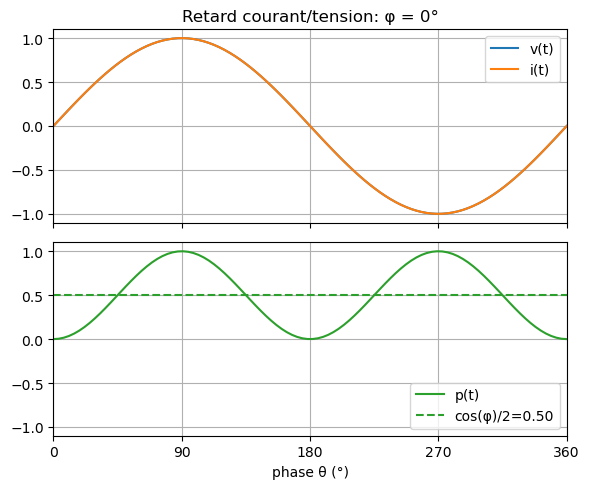

In [11]:
def plot_vip(phi_d):
    '''tracé tension-courant-puissance, avec retard phi(°)'''
    phi = d2r(phi_d)
    v = sin(th)
    i = sin(th-phi)
    p = v*i
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,5), sharex=True)
    ax1.plot(r2d(th), v, label='v(t)')
    ax1.plot(r2d(th), i, label='i(t)')
    ax2.plot(r2d(th), p, 'tab:green', label='p(t)')
    ax2.hlines(cos(phi)/2, 0, r2d(th_max), label='cos(φ)/2={:.2f}'.format(cos(phi)/2),
               colors='tab:green', linestyles='--')
    
    ax1.set(
        title='Retard courant/tension: φ = %.0f°' % r2d(phi),
    )
    ax2.set(
        xlim=(0, r2d(th_max)),
        xlabel='phase θ (°)',
        ylim=(-1.1, 1.1),
        xticks = [0, 90, 180, 270, 360]
    )
    ax1.legend(loc='upper right')
    ax1.grid(True)
    ax2.legend(loc='lower right')
    ax2.grid(True)
    
    fig.tight_layout()

    
plot_vip(0)

#### Cas particulier:

* Inductance idéale: 90°
* Condensateur idéal: -90°

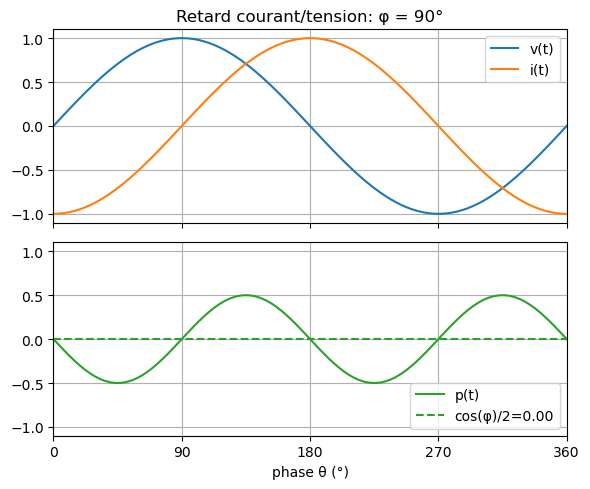

In [12]:
plot_vip(90)

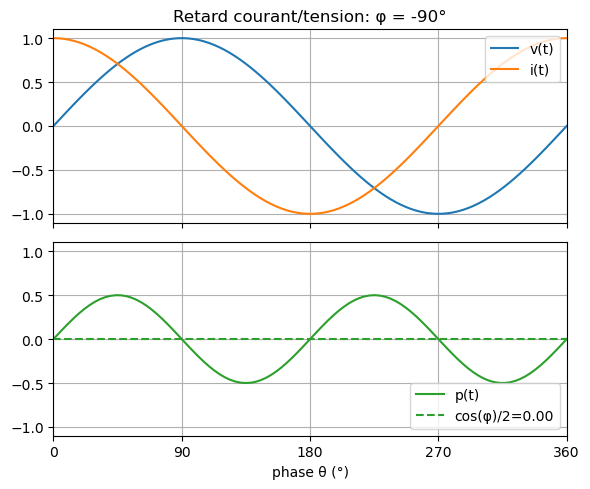

In [13]:
plot_vip(-90)

#### Tracé v, i, p interactif

In [14]:
interact(plot_vip, phi_d=(0, 180, 5));

interactive(children=(IntSlider(value=90, description='phi_d', max=180, step=5), Output()), _dom_classes=('wid…

Sauvegarde d'une série de graphs pour phi 0° → 180° (décommenter `plt.savefig`)

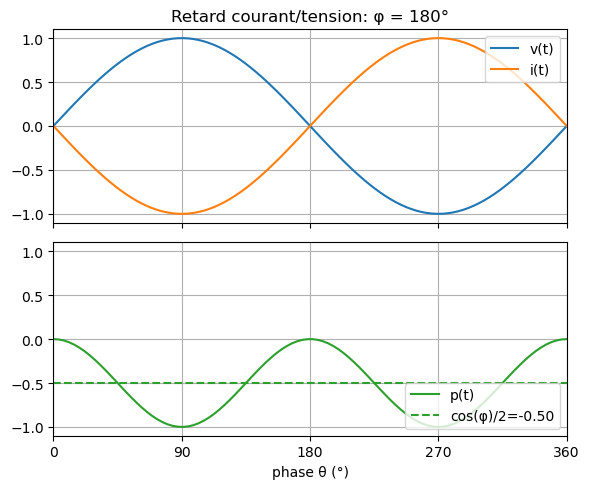

In [15]:
#for phi_d in range(-180, 181, 30):
for phi_d in range(0, 181, 5):
    plt.close()
    plot_vip(phi_d)
    #plt.savefig('vip_phi{:03.0f}.png'.format(phi_d), dpi=150)